# Importações e Leitura do DataSet

In [45]:
import optuna as opt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score  # Para validação cruzada durante tuning
import warnings
import time  # Para medir tempo de execução
 

In [46]:
df = pd.read_csv('churn.csv')


In [47]:
pd.set_option('display.max_columns', None)

In [48]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Análise Exploratória

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Análise da variável Senior Citizen

In [50]:
df['SeniorCitizen'].unique()

array([0, 1])

### Análise da variável Tenure

In [51]:
df['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

### Análise da Variável TotalCharges

In [52]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(6531,), dtype=object)

Verificamos que a variável total charges está com os valores no formato string ao invés de númericos

### Verificação de dados nulos

In [53]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Verificar valores duplicados

In [54]:
df.duplicated().sum()

np.int64(0)

In [55]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

# Processamento de dados

### remoção de colunas

In [56]:
df = df.drop(['customerID'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Transformação de variáveis

In [57]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Definindo as colunas categóricas

In [59]:
cat_cols = [
    "gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
    "PaperlessBilling", "PaymentMethod"
]

#### Aplicar One Hot Encoding

In [60]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [61]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7043 non-null   object 
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

### fazendo o map do churn de forma manual

In [62]:
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No':0})

In [63]:
df_encoded['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

### atribuindo o novo df_encoded ao df antigo

In [64]:
df = df_encoded

df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,True,True,True,True,False,True,False,False,False,True,False,False,False,True,False,True,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,0,False,True,True,True,False,True,True,False,False,False,False,True,False,True,False,False,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,0,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,1,True,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True


# Modelagem

### 1. Definindo as variavéis

In [65]:
X = df.drop('Churn', axis=1)
y = df['Churn']

### 2. Separar em treino e teste

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 3. Escolha e definição do modelo

In [67]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

### 4. Treinamento do modelo

In [68]:
model_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 5. Previsões

In [69]:
y_pred = model_rf.predict(X_test)
y_pred_proba = model_rf.predict_proba(X_test)[:,1]

### 6. Avaliações

In [70]:
print(f'Classification report \n{classification_report(y_test, y_pred)}')

Classification report 
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



### 7. Matriz de Confusão

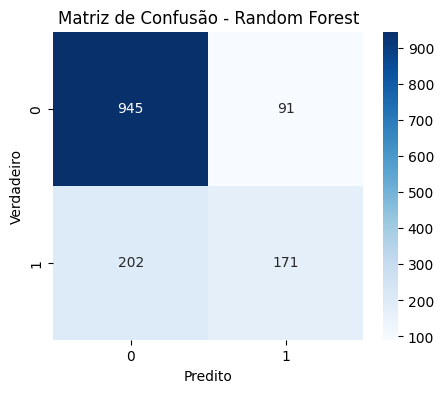

In [71]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predito"); plt.ylabel("Verdadeiro")
plt.show()

### 8. Curva Roc

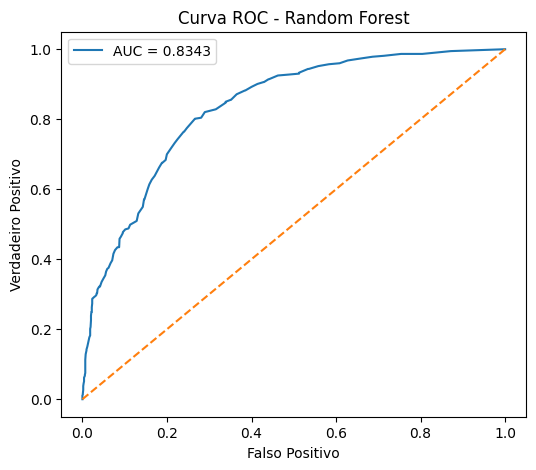

In [72]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
 
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.show()

### 9. Curva AUC PR

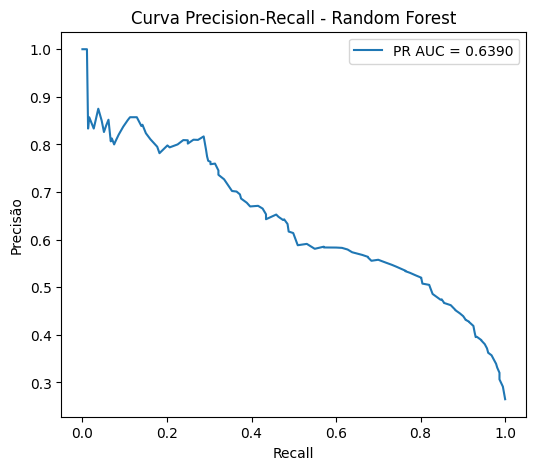

In [73]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
 
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precisão")
plt.title("Curva Precision-Recall - Random Forest")
plt.legend()
plt.show()

### Light GBM

In [74]:
model_lgbm = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)
 
model_lgbm.fit(X_train, y_train)
 
y_pred_lgbm = model_lgbm.predict(X_test)
y_proba_lgbm = model_lgbm.predict_proba(X_test)[:, 1]
 
print("Classification Report - LightGBM")
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000859 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418
Classification Report - LightGBM
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



## XGBoost

## Escolhendo o modelo

In [75]:
model_xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

## Treinamento e Previsão

In [76]:
model_xgb.fit(X_train, y_train)
 
y_pred_xgb = model_xgb.predict(X_test)
y_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

## Avaliações

In [77]:
print("Classification Report - XGBoost")
print(classification_report(y_test, y_pred_xgb))

Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



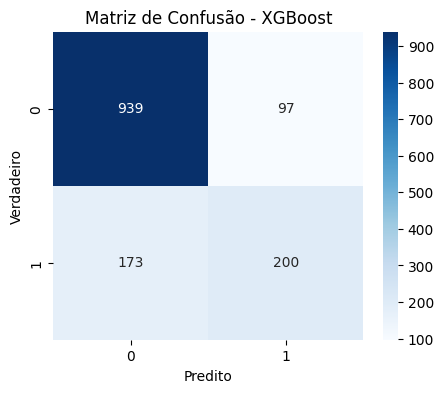

In [78]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - XGBoost")
plt.xlabel("Predito"); plt.ylabel("Verdadeiro")
plt.show()

# Tuning de Hiperparametros

### 1. Definino função do Optuna

In [79]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'random_state': 42,
        'verbosity': 0,
        'eval_metric': 'logloss'  # Métrica interna do XGBoost
    }
    
    model = XGBClassifier(**params)

    cv_scores = cross_val_score(
        model, X_train, y_train,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1
    )
    return cv_scores.mean()

### **Explicação dos parametros***

* n_estimators - é o nº de árvores que serão treinados / força do modelo
* learning_rate	- taxa com que as árvores corrigem os erros (valor menor, menos risco de overfitting / valor maior risco de overfitting)	
* max_depth	profundidade das árvores / complexidade
* min_child_weight - mínimo para dividir / regularização
* subsample -  % de linhas por árvore
* colsample_bytree - % de colunas por árvore
* gamma	- redução minima de perda necessária para fazer split / regularização
* reg_alpha	- regularização L1 / simplificação do modelo
* reg_lambda - 	regularização L2 / estabilidade
* eval_metric - métrica de avaliação
* use_label_encoder	legado - deve ser False
* random_state - define a semente de reprodutibilidade

***Trial Suggest***

Funciona como sistema inteligente que testa combinações de parâmetros. Porém, só consegue fazer isso se souber o tipo de cada parametro

### 2. Executando o modelo

In [80]:
start_time = time.time()

# Criar estudo Optuna para XGBoost
study = opt.create_study(
    direction='maximize',  # Queremos MAXIMIZAR o ROC AUC
    sampler=opt.samplers.TPESampler(seed=42),  # Algoritmo bayesiano com seed fixa
    study_name='xgboost_churn_optimization'  # Nome do experimento
)

# Executar otimização (vai chamar objective_xgboost 3000 vezes)
study.optimize(
    objective,
    n_trials=3000,  # Número de combinações a testar
    show_progress_bar=True  # Mostrar barra de progresso
)

end_time = time.time()
tempo_xgb = end_time - start_time

#print("\nBest trial params:")
#print(study.best_trial.params)
#print("\nBest F1 on validation (study.best_value):", study.best_value)
print(f"Tempo de execução: {tempo_xgb/60:.2f} minutos")

[I 2025-12-10 13:09:01,231] A new study created in memory with name: xgboost_churn_optimization
Best trial: 0. Best value: 0.808678:   0%|          | 1/3000 [00:00<10:03,  4.97it/s]

[I 2025-12-10 13:09:01,440] Trial 0 finished with value: 0.8086780994918661 and parameters: {'n_estimators': 218, 'learning_rate': 0.2536999076681772, 'max_depth': 8, 'min_child_weight': 6, 'gamma': 0.7800932022121826, 'subsample': 0.662397808134481, 'colsample_bytree': 0.6232334448672797}. Best is trial 0 with value: 0.8086780994918661.


Best trial: 2. Best value: 0.845295:   0%|          | 3/3000 [00:00<08:43,  5.72it/s]

[I 2025-12-10 13:09:01,642] Trial 1 finished with value: 0.8438171472196497 and parameters: {'n_estimators': 440, 'learning_rate': 0.07725378389307355, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 4.8495492608099715, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105}. Best is trial 1 with value: 0.8438171472196497.
[I 2025-12-10 13:09:01,784] Trial 2 finished with value: 0.845294888235071 and parameters: {'n_estimators': 132, 'learning_rate': 0.018659959624904916, 'max_depth': 5, 'min_child_weight': 6, 'gamma': 2.1597250932105787, 'subsample': 0.7164916560792167, 'colsample_bytree': 0.8447411578889518}. Best is trial 2 with value: 0.845294888235071.


Best trial: 3. Best value: 0.845671:   0%|          | 4/3000 [00:00<07:40,  6.51it/s]

[I 2025-12-10 13:09:01,906] Trial 3 finished with value: 0.8456714192029852 and parameters: {'n_estimators': 112, 'learning_rate': 0.027010527749605478, 'max_depth': 5, 'min_child_weight': 5, 'gamma': 3.925879806965068, 'subsample': 0.6798695128633439, 'colsample_bytree': 0.8056937753654446}. Best is trial 3 with value: 0.8456714192029852.


Best trial: 3. Best value: 0.845671:   0%|          | 5/3000 [00:01<11:44,  4.25it/s]

[I 2025-12-10 13:09:02,284] Trial 4 finished with value: 0.8380026830835 and parameters: {'n_estimators': 317, 'learning_rate': 0.011711509955524094, 'max_depth': 7, 'min_child_weight': 2, 'gamma': 0.3252579649263976, 'subsample': 0.9795542149013333, 'colsample_bytree': 0.9862528132298237}. Best is trial 3 with value: 0.8456714192029852.


Best trial: 3. Best value: 0.845671:   0%|          | 8/3000 [00:01<07:51,  6.34it/s]

[I 2025-12-10 13:09:02,519] Trial 5 finished with value: 0.8456468915392872 and parameters: {'n_estimators': 414, 'learning_rate': 0.028180680291847244, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 2.2007624686980067, 'subsample': 0.6488152939379115, 'colsample_bytree': 0.798070764044508}. Best is trial 3 with value: 0.8456714192029852.
[I 2025-12-10 13:09:02,588] Trial 6 finished with value: 0.8375825534495493 and parameters: {'n_estimators': 65, 'learning_rate': 0.22038218939289875, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 1.5585553804470549, 'subsample': 0.8080272084711243, 'colsample_bytree': 0.8186841117373118}. Best is trial 3 with value: 0.8456714192029852.
[I 2025-12-10 13:09:02,677] Trial 7 finished with value: 0.8432958749205415 and parameters: {'n_estimators': 133, 'learning_rate': 0.27051668818999286, 'max_depth': 9, 'min_child_weight': 10, 'gamma': 4.474136752138244, 'subsample': 0.8391599915244341, 'colsample_bytree': 0.9687496940092467}. Best is trial 3 with va

Best trial: 3. Best value: 0.845671:   0%|          | 10/3000 [00:01<07:15,  6.87it/s]

[I 2025-12-10 13:09:02,767] Trial 8 finished with value: 0.8410725445136222 and parameters: {'n_estimators': 89, 'learning_rate': 0.01947558230629543, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 1.9433864484474102, 'subsample': 0.7085396127095583, 'colsample_bytree': 0.9314950036607718}. Best is trial 3 with value: 0.8456714192029852.
[I 2025-12-10 13:09:02,930] Trial 9 finished with value: 0.8451523454361919 and parameters: {'n_estimators': 210, 'learning_rate': 0.026000059117302653, 'max_depth': 7, 'min_child_weight': 2, 'gamma': 4.010984903770199, 'subsample': 0.6298202574719083, 'colsample_bytree': 0.9947547746402069}. Best is trial 3 with value: 0.8456714192029852.


Best trial: 3. Best value: 0.845671:   0%|          | 11/3000 [00:01<07:37,  6.54it/s]

[I 2025-12-10 13:09:03,111] Trial 10 finished with value: 0.8455410849957129 and parameters: {'n_estimators': 281, 'learning_rate': 0.06690992453172909, 'max_depth': 5, 'min_child_weight': 10, 'gamma': 3.369860450173899, 'subsample': 0.7521171841007243, 'colsample_bytree': 0.73725841938494}. Best is trial 3 with value: 0.8456714192029852.


Best trial: 11. Best value: 0.845833:   0%|          | 12/3000 [00:02<08:50,  5.63it/s]

[I 2025-12-10 13:09:03,362] Trial 11 finished with value: 0.845832520398204 and parameters: {'n_estimators': 483, 'learning_rate': 0.044803827213195875, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.0872723649651057, 'subsample': 0.6106656736473042, 'colsample_bytree': 0.8742955831830228}. Best is trial 11 with value: 0.845832520398204.


Best trial: 11. Best value: 0.845833:   0%|          | 13/3000 [00:02<09:45,  5.10it/s]

[I 2025-12-10 13:09:03,613] Trial 12 finished with value: 0.8455514006102236 and parameters: {'n_estimators': 482, 'learning_rate': 0.03939317354484882, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 3.2629493764683297, 'subsample': 0.6015024223945927, 'colsample_bytree': 0.881791526989573}. Best is trial 11 with value: 0.845832520398204.


Best trial: 11. Best value: 0.845833:   0%|          | 15/3000 [00:02<09:05,  5.47it/s]

[I 2025-12-10 13:09:03,810] Trial 13 finished with value: 0.845211300225175 and parameters: {'n_estimators': 360, 'learning_rate': 0.1071873743912074, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 3.3431289478203157, 'subsample': 0.6832384449578339, 'colsample_bytree': 0.7400028246550391}. Best is trial 11 with value: 0.845832520398204.
[I 2025-12-10 13:09:03,955] Trial 14 finished with value: 0.8445944343116942 and parameters: {'n_estimators': 199, 'learning_rate': 0.04504624949428859, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 2.9161357698316372, 'subsample': 0.7589670670409671, 'colsample_bytree': 0.8841190389237527}. Best is trial 11 with value: 0.845832520398204.


Best trial: 11. Best value: 0.845833:   1%|          | 16/3000 [00:02<09:48,  5.07it/s]

[I 2025-12-10 13:09:04,191] Trial 15 finished with value: 0.8455757853037748 and parameters: {'n_estimators': 500, 'learning_rate': 0.1196890828618731, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 3.8756616228460175, 'subsample': 0.8524337374155859, 'colsample_bytree': 0.7834772962915398}. Best is trial 11 with value: 0.845832520398204.


Best trial: 16. Best value: 0.846068:   1%|          | 17/3000 [00:03<09:59,  4.98it/s]

[I 2025-12-10 13:09:04,399] Trial 16 finished with value: 0.846068105073719 and parameters: {'n_estimators': 373, 'learning_rate': 0.035614363160806004, 'max_depth': 4, 'min_child_weight': 9, 'gamma': 4.048039329319524, 'subsample': 0.601047414142533, 'colsample_bytree': 0.9019190917261364}. Best is trial 16 with value: 0.846068105073719.


Best trial: 16. Best value: 0.846068:   1%|          | 18/3000 [00:03<10:25,  4.77it/s]

[I 2025-12-10 13:09:04,630] Trial 17 finished with value: 0.843199036012359 and parameters: {'n_estimators': 380, 'learning_rate': 0.05014258595756229, 'max_depth': 10, 'min_child_weight': 9, 'gamma': 2.717249091337501, 'subsample': 0.6018960478612357, 'colsample_bytree': 0.916172269405959}. Best is trial 16 with value: 0.846068105073719.


Best trial: 16. Best value: 0.846068:   1%|          | 19/3000 [00:03<11:18,  4.40it/s]

[I 2025-12-10 13:09:04,901] Trial 18 finished with value: 0.8452651440365614 and parameters: {'n_estimators': 444, 'learning_rate': 0.010464537569655475, 'max_depth': 4, 'min_child_weight': 9, 'gamma': 4.951494926700002, 'subsample': 0.8907859007152178, 'colsample_bytree': 0.8666142557230876}. Best is trial 16 with value: 0.846068105073719.


Best trial: 16. Best value: 0.846068:   1%|          | 20/3000 [00:03<11:09,  4.45it/s]

[I 2025-12-10 13:09:05,119] Trial 19 finished with value: 0.826615382212361 and parameters: {'n_estimators': 351, 'learning_rate': 0.13743949612028655, 'max_depth': 6, 'min_child_weight': 8, 'gamma': 1.324414537995385, 'subsample': 0.7549767826539262, 'colsample_bytree': 0.9255974822311326}. Best is trial 16 with value: 0.846068105073719.


Best trial: 16. Best value: 0.846068:   1%|          | 21/3000 [00:04<11:02,  4.50it/s]

[I 2025-12-10 13:09:05,337] Trial 20 finished with value: 0.8456146831278094 and parameters: {'n_estimators': 396, 'learning_rate': 0.03676504579292094, 'max_depth': 4, 'min_child_weight': 10, 'gamma': 4.340331534743572, 'subsample': 0.6305157307984756, 'colsample_bytree': 0.9395973014339374}. Best is trial 16 with value: 0.846068105073719.


Best trial: 16. Best value: 0.846068:   1%|          | 22/3000 [00:04<10:32,  4.71it/s]

[I 2025-12-10 13:09:05,524] Trial 21 finished with value: 0.8458745325019809 and parameters: {'n_estimators': 276, 'learning_rate': 0.02448809122832654, 'max_depth': 5, 'min_child_weight': 5, 'gamma': 3.9874892522318373, 'subsample': 0.6934558001831825, 'colsample_bytree': 0.8340419631080439}. Best is trial 16 with value: 0.846068105073719.


Best trial: 16. Best value: 0.846068:   1%|          | 24/3000 [00:04<09:28,  5.23it/s]

[I 2025-12-10 13:09:05,713] Trial 22 finished with value: 0.8456967049132322 and parameters: {'n_estimators': 294, 'learning_rate': 0.0185927715102448, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.614678030629977, 'subsample': 0.7137440747408894, 'colsample_bytree': 0.840134977750168}. Best is trial 16 with value: 0.846068105073719.
[I 2025-12-10 13:09:05,871] Trial 23 finished with value: 0.8450884161144743 and parameters: {'n_estimators': 241, 'learning_rate': 0.058393970664223985, 'max_depth': 4, 'min_child_weight': 7, 'gamma': 3.0644260505808427, 'subsample': 0.6054361025306862, 'colsample_bytree': 0.8908407031195642}. Best is trial 16 with value: 0.846068105073719.


Best trial: 24. Best value: 0.846221:   1%|          | 25/3000 [00:04<09:36,  5.16it/s]

[I 2025-12-10 13:09:06,069] Trial 24 finished with value: 0.8462213720597612 and parameters: {'n_estimators': 331, 'learning_rate': 0.031865343638394966, 'max_depth': 5, 'min_child_weight': 9, 'gamma': 4.370758204210595, 'subsample': 0.6528960661935768, 'colsample_bytree': 0.7589955439149414}. Best is trial 24 with value: 0.8462213720597612.


Best trial: 25. Best value: 0.846253:   1%|          | 26/3000 [00:05<09:57,  4.98it/s]

[I 2025-12-10 13:09:06,290] Trial 25 finished with value: 0.8462529271027497 and parameters: {'n_estimators': 312, 'learning_rate': 0.014324812323146507, 'max_depth': 6, 'min_child_weight': 9, 'gamma': 4.3159287350431965, 'subsample': 0.6600589968032442, 'colsample_bytree': 0.7581202346790605}. Best is trial 25 with value: 0.8462529271027497.


Best trial: 25. Best value: 0.846253:   1%|          | 27/3000 [00:05<10:25,  4.75it/s]

[I 2025-12-10 13:09:06,521] Trial 26 finished with value: 0.8459984850009604 and parameters: {'n_estimators': 331, 'learning_rate': 0.013497018732152671, 'max_depth': 6, 'min_child_weight': 9, 'gamma': 4.353927239483539, 'subsample': 0.6532201048537977, 'colsample_bytree': 0.7502241201894382}. Best is trial 25 with value: 0.8462529271027497.


Best trial: 25. Best value: 0.846253:   1%|          | 29/3000 [00:05<10:01,  4.94it/s]

[I 2025-12-10 13:09:06,739] Trial 27 finished with value: 0.84554397163291 and parameters: {'n_estimators': 318, 'learning_rate': 0.015157155026427033, 'max_depth': 7, 'min_child_weight': 9, 'gamma': 4.6255787750928485, 'subsample': 0.7387616679485546, 'colsample_bytree': 0.6974040046404777}. Best is trial 25 with value: 0.8462529271027497.
[I 2025-12-10 13:09:06,919] Trial 28 finished with value: 0.8457832851956877 and parameters: {'n_estimators': 258, 'learning_rate': 0.0335349983665984, 'max_depth': 6, 'min_child_weight': 10, 'gamma': 3.669730161635142, 'subsample': 0.7904900013069247, 'colsample_bytree': 0.7671067794924094}. Best is trial 25 with value: 0.8462529271027497.


Best trial: 25. Best value: 0.846253:   1%|          | 30/3000 [00:05<08:45,  5.66it/s]

[I 2025-12-10 13:09:07,036] Trial 29 finished with value: 0.8453347037602106 and parameters: {'n_estimators': 171, 'learning_rate': 0.0799012921536858, 'max_depth': 6, 'min_child_weight': 7, 'gamma': 4.216221037639429, 'subsample': 0.659819458471337, 'colsample_bytree': 0.6604764267360032}. Best is trial 25 with value: 0.8462529271027497.


Best trial: 25. Best value: 0.846253:   1%|          | 31/3000 [00:06<09:33,  5.18it/s]

[I 2025-12-10 13:09:07,265] Trial 30 finished with value: 0.8459976596502085 and parameters: {'n_estimators': 353, 'learning_rate': 0.015127810323153036, 'max_depth': 8, 'min_child_weight': 9, 'gamma': 4.740843410682163, 'subsample': 0.6366672250265574, 'colsample_bytree': 0.6088017347852452}. Best is trial 25 with value: 0.8462529271027497.


Best trial: 31. Best value: 0.84637:   1%|          | 32/3000 [00:06<10:12,  4.84it/s] 

[I 2025-12-10 13:09:07,505] Trial 31 finished with value: 0.846369823757352 and parameters: {'n_estimators': 329, 'learning_rate': 0.012586794762086365, 'max_depth': 6, 'min_child_weight': 9, 'gamma': 4.340493465153248, 'subsample': 0.6633406371196147, 'colsample_bytree': 0.7470107596461466}. Best is trial 31 with value: 0.846369823757352.


Best trial: 31. Best value: 0.84637:   1%|          | 33/3000 [00:06<10:27,  4.73it/s]

[I 2025-12-10 13:09:07,726] Trial 32 finished with value: 0.845886006667004 and parameters: {'n_estimators': 303, 'learning_rate': 0.010129763340540955, 'max_depth': 5, 'min_child_weight': 8, 'gamma': 4.903812103455536, 'subsample': 0.6771209522649876, 'colsample_bytree': 0.7097074981733815}. Best is trial 31 with value: 0.846369823757352.


Best trial: 31. Best value: 0.84637:   1%|          | 34/3000 [00:06<10:52,  4.55it/s]

[I 2025-12-10 13:09:07,967] Trial 33 finished with value: 0.8458909938204974 and parameters: {'n_estimators': 416, 'learning_rate': 0.01998177965146877, 'max_depth': 7, 'min_child_weight': 9, 'gamma': 4.179348875671404, 'subsample': 0.665040997165214, 'colsample_bytree': 0.6537135219185505}. Best is trial 31 with value: 0.846369823757352.


Best trial: 31. Best value: 0.84637:   1%|          | 36/3000 [00:07<09:57,  4.96it/s]

[I 2025-12-10 13:09:08,175] Trial 34 finished with value: 0.8458223055543981 and parameters: {'n_estimators': 376, 'learning_rate': 0.03165061459013809, 'max_depth': 8, 'min_child_weight': 10, 'gamma': 3.6314349505283365, 'subsample': 0.7265444354548616, 'colsample_bytree': 0.7096611476877965}. Best is trial 31 with value: 0.846369823757352.
[I 2025-12-10 13:09:08,343] Trial 35 finished with value: 0.8462769542537144 and parameters: {'n_estimators': 243, 'learning_rate': 0.022577918288179042, 'max_depth': 5, 'min_child_weight': 6, 'gamma': 4.564741208492566, 'subsample': 0.62780164091432, 'colsample_bytree': 0.7639140718114782}. Best is trial 31 with value: 0.846369823757352.


Best trial: 31. Best value: 0.84637:   1%|          | 37/3000 [00:07<09:44,  5.07it/s]

[I 2025-12-10 13:09:08,530] Trial 36 finished with value: 0.8461005373962174 and parameters: {'n_estimators': 245, 'learning_rate': 0.013860039518386946, 'max_depth': 5, 'min_child_weight': 6, 'gamma': 4.765999474725392, 'subsample': 0.6883149234307089, 'colsample_bytree': 0.7714474938094587}. Best is trial 31 with value: 0.846369823757352.


Best trial: 31. Best value: 0.84637:   1%|▏         | 38/3000 [00:07<09:37,  5.13it/s]

[I 2025-12-10 13:09:08,720] Trial 37 finished with value: 0.8454955681110619 and parameters: {'n_estimators': 325, 'learning_rate': 0.022552314251372746, 'max_depth': 6, 'min_child_weight': 6, 'gamma': 4.525168482677055, 'subsample': 0.9993134344664012, 'colsample_bytree': 0.7245074898753847}. Best is trial 31 with value: 0.846369823757352.


Best trial: 31. Best value: 0.84637:   1%|▏         | 39/3000 [00:07<10:00,  4.93it/s]

[I 2025-12-10 13:09:08,940] Trial 38 finished with value: 0.8442151973631757 and parameters: {'n_estimators': 257, 'learning_rate': 0.016020511002465574, 'max_depth': 5, 'min_child_weight': 3, 'gamma': 0.11693767983518244, 'subsample': 0.6354131656712746, 'colsample_bytree': 0.7998187907942694}. Best is trial 31 with value: 0.846369823757352.


Best trial: 31. Best value: 0.84637:   1%|▏         | 40/3000 [00:07<09:51,  5.00it/s]

[I 2025-12-10 13:09:09,131] Trial 39 finished with value: 0.8442378782151847 and parameters: {'n_estimators': 175, 'learning_rate': 0.017842543823133716, 'max_depth': 7, 'min_child_weight': 1, 'gamma': 2.460600767918329, 'subsample': 0.7828663979151492, 'colsample_bytree': 0.6622282595642106}. Best is trial 31 with value: 0.846369823757352.


Best trial: 31. Best value: 0.84637:   1%|▏         | 41/3000 [00:08<10:11,  4.84it/s]

[I 2025-12-10 13:09:09,352] Trial 40 finished with value: 0.8457096771975179 and parameters: {'n_estimators': 295, 'learning_rate': 0.012494938507362212, 'max_depth': 5, 'min_child_weight': 6, 'gamma': 4.995330631195313, 'subsample': 0.9442430274371364, 'colsample_bytree': 0.8140063334978853}. Best is trial 31 with value: 0.846369823757352.


Best trial: 31. Best value: 0.84637:   1%|▏         | 42/3000 [00:08<09:57,  4.95it/s]

[I 2025-12-10 13:09:09,545] Trial 41 finished with value: 0.8454587593352345 and parameters: {'n_estimators': 241, 'learning_rate': 0.01267857283663165, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 4.661230074006847, 'subsample': 0.6962021128332635, 'colsample_bytree': 0.7697729541170389}. Best is trial 31 with value: 0.846369823757352.


Best trial: 42. Best value: 0.846399:   1%|▏         | 44/3000 [00:08<09:06,  5.41it/s]

[I 2025-12-10 13:09:09,724] Trial 42 finished with value: 0.8463991002844535 and parameters: {'n_estimators': 240, 'learning_rate': 0.02257342630022958, 'max_depth': 6, 'min_child_weight': 6, 'gamma': 4.471349615445289, 'subsample': 0.6668064305939037, 'colsample_bytree': 0.7636368746964858}. Best is trial 42 with value: 0.8463991002844535.
[I 2025-12-10 13:09:09,884] Trial 43 finished with value: 0.8460526345433965 and parameters: {'n_estimators': 219, 'learning_rate': 0.02905034834715327, 'max_depth': 6, 'min_child_weight': 7, 'gamma': 4.454816892368802, 'subsample': 0.6629593882263926, 'colsample_bytree': 0.7517962718222775}. Best is trial 42 with value: 0.8463991002844535.


[I 2025-12-10 13:09:10,104] Trial 44 finished with value: 0.8459890173803286 and parameters: {'n_estimators': 341, 'learning_rate': 0.022915258924691668, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 3.84886687199742, 'subsample': 0.6231567451777527, 'colsample_bytree': 0.790555867349301}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 42. Best value: 0.846399:   2%|▏         | 47/3000 [00:09<08:51,  5.55it/s]

[I 2025-12-10 13:09:10,281] Trial 45 finished with value: 0.8459652249051496 and parameters: {'n_estimators': 221, 'learning_rate': 0.01976912748288361, 'max_depth': 6, 'min_child_weight': 8, 'gamma': 4.216146139846768, 'subsample': 0.6453875294132447, 'colsample_bytree': 0.7239764523980582}. Best is trial 42 with value: 0.8463991002844535.
[I 2025-12-10 13:09:10,440] Trial 46 finished with value: 0.8449345178169658 and parameters: {'n_estimators': 180, 'learning_rate': 0.01674433697569997, 'max_depth': 5, 'min_child_weight': 5, 'gamma': 1.0446057118280205, 'subsample': 0.6716595144181582, 'colsample_bytree': 0.6887610630959861}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 42. Best value: 0.846399:   2%|▏         | 48/3000 [00:09<08:16,  5.95it/s]

[I 2025-12-10 13:09:10,577] Trial 47 finished with value: 0.8456610516206432 and parameters: {'n_estimators': 151, 'learning_rate': 0.02775431195706743, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 3.7533503422232526, 'subsample': 0.7008697912964608, 'colsample_bytree': 0.8238325783689997}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 42. Best value: 0.846399:   2%|▏         | 49/3000 [00:09<08:46,  5.61it/s]

[I 2025-12-10 13:09:10,780] Trial 48 finished with value: 0.8454004681324759 and parameters: {'n_estimators': 273, 'learning_rate': 0.021454836086980813, 'max_depth': 7, 'min_child_weight': 7, 'gamma': 3.420750802485501, 'subsample': 0.7278025825118782, 'colsample_bytree': 0.7585723398538926}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 42. Best value: 0.846399:   2%|▏         | 51/3000 [00:09<09:02,  5.44it/s]

[I 2025-12-10 13:09:11,029] Trial 49 finished with value: 0.8457787254287645 and parameters: {'n_estimators': 298, 'learning_rate': 0.01112667209800568, 'max_depth': 5, 'min_child_weight': 10, 'gamma': 4.529655805076946, 'subsample': 0.6181076191061383, 'colsample_bytree': 0.7349323531952939}. Best is trial 42 with value: 0.8463991002844535.
[I 2025-12-10 13:09:11,177] Trial 50 finished with value: 0.8462618235070469 and parameters: {'n_estimators': 197, 'learning_rate': 0.04099339499367268, 'max_depth': 8, 'min_child_weight': 8, 'gamma': 4.163750982201623, 'subsample': 0.6465923158612856, 'colsample_bytree': 0.7773985393382491}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 42. Best value: 0.846399:   2%|▏         | 53/3000 [00:10<08:19,  5.91it/s]

[I 2025-12-10 13:09:11,325] Trial 51 finished with value: 0.8461324138192154 and parameters: {'n_estimators': 198, 'learning_rate': 0.04106884361669006, 'max_depth': 9, 'min_child_weight': 8, 'gamma': 4.0499518078998, 'subsample': 0.6477080137323644, 'colsample_bytree': 0.7827866167984401}. Best is trial 42 with value: 0.8463991002844535.
[I 2025-12-10 13:09:11,485] Trial 52 finished with value: 0.8461261718575009 and parameters: {'n_estimators': 227, 'learning_rate': 0.029729885785456312, 'max_depth': 8, 'min_child_weight': 8, 'gamma': 4.212397559289871, 'subsample': 0.6797465673760263, 'colsample_bytree': 0.8060801410896855}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 42. Best value: 0.846399:   2%|▏         | 55/3000 [00:10<07:46,  6.32it/s]

[I 2025-12-10 13:09:11,675] Trial 53 finished with value: 0.8442782436029603 and parameters: {'n_estimators': 196, 'learning_rate': 0.025405896768009473, 'max_depth': 9, 'min_child_weight': 9, 'gamma': 1.8334509785171669, 'subsample': 0.6237256345227178, 'colsample_bytree': 0.7448422596774348}. Best is trial 42 with value: 0.8463991002844535.
[I 2025-12-10 13:09:11,793] Trial 54 finished with value: 0.8454104683843051 and parameters: {'n_estimators': 135, 'learning_rate': 0.05646424147251656, 'max_depth': 6, 'min_child_weight': 10, 'gamma': 4.394069473809464, 'subsample': 0.6464405869894454, 'colsample_bytree': 0.7860135045032245}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 42. Best value: 0.846399:   2%|▏         | 56/3000 [00:10<07:54,  6.21it/s]

[I 2025-12-10 13:09:11,963] Trial 55 finished with value: 0.8459605496367908 and parameters: {'n_estimators': 270, 'learning_rate': 0.042926617259152776, 'max_depth': 10, 'min_child_weight': 9, 'gamma': 4.057772073852835, 'subsample': 0.7106998119664305, 'colsample_bytree': 0.7234363805336573}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 42. Best value: 0.846399:   2%|▏         | 57/3000 [00:10<08:12,  5.97it/s]

[I 2025-12-10 13:09:12,143] Trial 56 finished with value: 0.8459687446121228 and parameters: {'n_estimators': 315, 'learning_rate': 0.04851850714623562, 'max_depth': 7, 'min_child_weight': 8, 'gamma': 4.73322661056336, 'subsample': 0.6674501510412976, 'colsample_bytree': 0.765379147542064}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 42. Best value: 0.846399:   2%|▏         | 59/3000 [00:11<08:28,  5.79it/s]

[I 2025-12-10 13:09:12,333] Trial 57 finished with value: 0.8458671047554844 and parameters: {'n_estimators': 283, 'learning_rate': 0.03384395996764796, 'max_depth': 6, 'min_child_weight': 9, 'gamma': 3.866428814629278, 'subsample': 0.6169718003256249, 'colsample_bytree': 0.7359639705175376}. Best is trial 42 with value: 0.8463991002844535.
[I 2025-12-10 13:09:12,502] Trial 58 finished with value: 0.8430252081101625 and parameters: {'n_estimators': 107, 'learning_rate': 0.014422363263606434, 'max_depth': 8, 'min_child_weight': 5, 'gamma': 0.6430931572422787, 'subsample': 0.8561703534190572, 'colsample_bytree': 0.6754952110250191}. Best is trial 42 with value: 0.8463991002844535.


Best trial: 59. Best value: 0.846516:   2%|▏         | 61/3000 [00:11<07:52,  6.22it/s]

[I 2025-12-10 13:09:12,653] Trial 59 finished with value: 0.8465158414262973 and parameters: {'n_estimators': 257, 'learning_rate': 0.07934100052486963, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 3.4621245808350234, 'subsample': 0.8174649324854347, 'colsample_bytree': 0.7783117576889628}. Best is trial 59 with value: 0.8465158414262973.
[I 2025-12-10 13:09:12,802] Trial 60 finished with value: 0.8460414436421276 and parameters: {'n_estimators': 253, 'learning_rate': 0.08942603173835707, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 3.4398207728423627, 'subsample': 0.8208820206786352, 'colsample_bytree': 0.8606914252809951}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   2%|▏         | 63/3000 [00:11<08:05,  6.05it/s]

[I 2025-12-10 13:09:12,961] Trial 61 finished with value: 0.8459333203491901 and parameters: {'n_estimators': 305, 'learning_rate': 0.08699361980829526, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 4.360598923367807, 'subsample': 0.8798775909854814, 'colsample_bytree': 0.7772733147167489}. Best is trial 59 with value: 0.8465158414262973.
[I 2025-12-10 13:09:13,139] Trial 62 finished with value: 0.8454482384673272 and parameters: {'n_estimators': 337, 'learning_rate': 0.06522781469900907, 'max_depth': 5, 'min_child_weight': 4, 'gamma': 4.5907077088012285, 'subsample': 0.8284754354202111, 'colsample_bytree': 0.7590265780774619}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   2%|▏         | 65/3000 [00:12<07:30,  6.51it/s]

[I 2025-12-10 13:09:13,268] Trial 63 finished with value: 0.8460336168960001 and parameters: {'n_estimators': 212, 'learning_rate': 0.10631585692969947, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 4.847728295621824, 'subsample': 0.8047928845739999, 'colsample_bytree': 0.8042011013817207}. Best is trial 59 with value: 0.8465158414262973.
[I 2025-12-10 13:09:13,418] Trial 64 finished with value: 0.8454016113466171 and parameters: {'n_estimators': 240, 'learning_rate': 0.06642169571001373, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 3.1545718969053826, 'subsample': 0.7831927971484205, 'colsample_bytree': 0.8262631059220634}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   2%|▏         | 67/3000 [00:12<08:02,  6.08it/s]

[I 2025-12-10 13:09:13,618] Trial 65 finished with value: 0.8421829771905569 and parameters: {'n_estimators': 394, 'learning_rate': 0.19575411549103813, 'max_depth': 6, 'min_child_weight': 2, 'gamma': 4.1552014098134515, 'subsample': 0.6400706590953377, 'colsample_bytree': 0.7102842870921028}. Best is trial 59 with value: 0.8465158414262973.
[I 2025-12-10 13:09:13,775] Trial 66 finished with value: 0.8456979571230617 and parameters: {'n_estimators': 264, 'learning_rate': 0.05080455904910159, 'max_depth': 6, 'min_child_weight': 5, 'gamma': 4.293523234113241, 'subsample': 0.6554604180254948, 'colsample_bytree': 0.789239618326082}. Best is trial 59 with value: 0.8465158414262973.


Best trial: 59. Best value: 0.846516:   2%|▏         | 67/3000 [00:13<09:59,  4.89it/s]


[W 2025-12-10 13:09:14,854] Trial 67 failed with parameters: {'n_estimators': 284, 'learning_rate': 0.01163606301834161, 'max_depth': 5, 'min_child_weight': 9, 'gamma': 2.8754093317484917, 'subsample': 0.76755056598184, 'colsample_bytree': 0.8511246446769685} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\Aleksander\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\optuna\study\_optimize.py", line 205, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\Aleksander\AppData\Local\Temp\ipykernel_20360\1043968137.py", line 17, in objective
    cv_scores = cross_val_score(
                ^^^^^^^^^^^^^^^^
  File "C:\Users\Aleksander\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\_param_validation.py", line 218, in wrapper
   

KeyboardInterrupt: 

### 3. Treinar o modelo com os melhores parametros

In [ ]:
best_params = study.best_params
best_params["random_state"] = 42
best_params["eval_metric"] = "logloss"
best_params["use_label_encoder"] = False

final_model = XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

y_pred_final = final_model.predict(X_test)
y_proba_final = final_model.predict_proba(X_test)[:,1]

print("\n--- Tuned XGBoost Classification Report ---")
print(classification_report(y_test, y_pred_final))
print("F1 (tuned):", f1_score(y_test, y_pred_final))


C:\Users\Aleksander\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:199: UserWarning: [13:04:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Tuned XGBoost Classification Report ---
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.69      0.57      0.63       373

    accuracy                           0.82      1409
   macro avg       0.78      0.74      0.76      1409
weighted avg       0.81      0.82      0.81      1409

F1 (tuned): 0.6284875183553598


## Matriz de Confusão

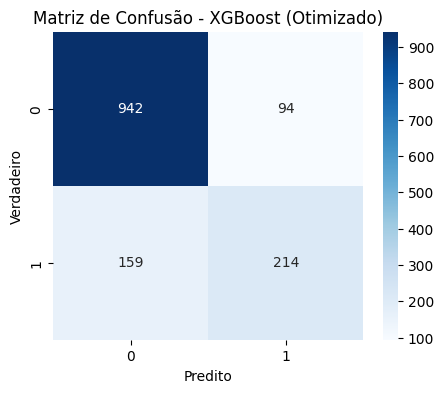

In [ ]:
cm_xgb = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - XGBoost (Otimizado)")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()

## Curva ROC

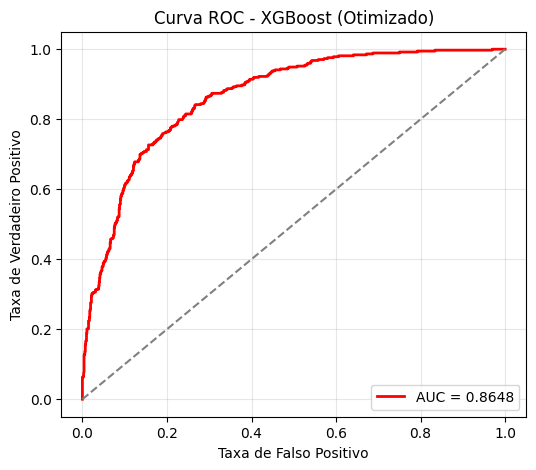

In [ ]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_final)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.figure(figsize=(6,5))
plt.plot(fpr_xgb, tpr_xgb, label=f"AUC = {roc_auc_xgb:.4f}", color='red', linewidth=2)
plt.plot([0,1], [0,1], linestyle="--", color='gray')
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.title("Curva ROC - XGBoost (Otimizado)")
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

## Curva AUC - PR

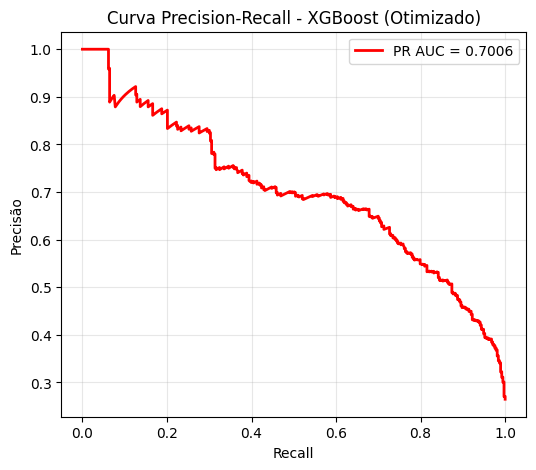

In [ ]:
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_proba_final)
pr_auc_xgb = auc(recall_xgb, precision_xgb)
plt.figure(figsize=(6,5))
plt.plot(recall_xgb, precision_xgb, label=f"PR AUC = {pr_auc_xgb:.4f}", color='red', linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precisão")
plt.title("Curva Precision-Recall - XGBoost (Otimizado)")
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.show()

Realizando uma análise na matriz de confusão, podemos notar uma melhora no nível de acerto das previsões. O XGBoost com os hiperparametros ajudaram a melhorar 

## Quanto tempo demorou para rodar?

Como eu adicionei 3000 trials, para testar o tempo, a execução levou os minutos informado abaixo.

In [ ]:
print(f"Tempo de execução: {tempo_xgb/60:.2f} minutos")

Tempo de execução: 8.98 minutos


## Você conseguiu otimizar algum resultado? Se sim, qual? Se não, o que você acha que aconteceu?

De acordo com os gráfico de confusão otimizou o resulta de previsão, aumento o número de acertos no Verdadeiro Positivo e no Verdadeiro Negativo.